# Importação

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import re
from datetime import datetime
from google.colab import files
from google.colab import drive
pd.set_option('display.max_columns', None)

# Considerações

Esse notebook foi usado para um estudo sobre os doadores fenotipados da região da Tríplece Fronteira entre Brasil, Paraguai e Argentina. Todos os dados listados foram pré-processados para que não hajam dados sensíveis, mantendo apenas dados que possam ser manipulados para compreender algum padrão

In [ ]:
uploaded = files.upload()

# Obter o nome do arquivo carregado
dados = list(uploaded.keys())[0]

# Carregar o DataFrame a partir do arquivo Excel
df_raw = pd.read_excel(dados)
df_raw

Saving dados_doadores.xlsx to dados_doadores (2).xlsx


,Id_doador,ABO,RH,Fenotipagem,Sexo,Nacionalidade,Raca,Idade
0,501561560,O,P,e+ Di(a)-,Feminino,Brasil,Branco,53
1,251222953,A,P,Di(a)-,Masculino,Brasil,Branco,36
2,400738878,O,N,Di(a)-,Masculino,Brasil,Branco,42
3,664526015,A,P,Di(a)-,Feminino,Brasil,Moreno/Pardo,40
4,858302779,O,N,Di(a)-,Masculino,Brasil,Branco,44
...,...,...,...,...,...,...,...,...
9121,106895823,O,N,K-,Masculino,Brasil,Branco,36
9122,479345213,O,N,K-,Masculino,Brasil,Não informado,34
9123,601486942,O,N,K-,Masculino,Brasil,Não informado,30
9124,177320817,A,N,K-,Feminino,Brasil,Branco,34


In [ ]:
df = df_raw.copy()

In [ ]:
df

,Id_doador,ABO,RH,Fenotipagem,Sexo,Nacionalidade,Raca,Idade
0,501561560,O,P,e+ Di(a)-,Feminino,Brasil,Branco,53
1,251222953,A,P,Di(a)-,Masculino,Brasil,Branco,36
2,400738878,O,N,Di(a)-,Masculino,Brasil,Branco,42
3,664526015,A,P,Di(a)-,Feminino,Brasil,Moreno/Pardo,40
4,858302779,O,N,Di(a)-,Masculino,Brasil,Branco,44
...,...,...,...,...,...,...,...,...
9121,106895823,O,N,K-,Masculino,Brasil,Branco,36
9122,479345213,O,N,K-,Masculino,Brasil,Não informado,34
9123,601486942,O,N,K-,Masculino,Brasil,Não informado,30
9124,177320817,A,N,K-,Feminino,Brasil,Branco,34


# Functions

In [ ]:
def tabela_total(df,atributo):
  dados = df.groupby([atributo]).size().reset_index(name="total")
  dados_totais = dados['total'].sum()
  dados['pct'] = round((dados['total']*100) / dados_totais,2)
  display(dados)
  return dados

In [ ]:
#Plotagem de gráfico de barras
def plot_chart(df,atributo,colors,chart_title,x_sub,y_sub):
  df = df.sort_values(by='total', ascending=False)

  # Criar o gráfico de barras
  plt.figure(figsize=(8, 6))
  bars = plt.bar(df[atributo], df['total'], color= colors)

  #Gera identificações
  plt.title(chart_title)
  plt.xlabel(x_sub)
  plt.ylabel(y_sub)

  # Adicionar rótulos com os números totais acima de cada barra
  for bar in bars:
      yval = bar.get_height()
      plt.text(bar.get_x() + bar.get_width() / 2, yval + 100, int(yval), ha='center', va='bottom')

  # Definir os limites do eixo y para o ponto máximo + 300
  plt.ylim(0, max(df['total']) + 300)

  # Mostrar o gráfico
  plt.show()

In [ ]:
def categorizar_idade(idade):
    if idade < 18:
        return 'Menos de 18'
    elif 18 <= idade <= 29:
        return 'Entre 18 e 29'
    elif 30 <= idade <= 59:
        return 'Entre 30 e 59'
    else:
        return 'Acima de 60'

In [ ]:
def mapear_regiao(nacionalidade):
    if nacionalidade in ['Brasil', 'Argentina', 'Paraguai']:
        return nacionalidade
    else:
        return 'Outros países'

In [ ]:
def extrair_fenotipos(fenotipagem):
    fenotipos = set()
    tokens = fenotipagem.split()
    for token in tokens:
        if token.endswith('-') or token.endswith('+'):
            fenotipos.add(token)
    return list(fenotipos)

In [ ]:
def extrair_fenotipos_todas_linhas(df):
    fenotipos = set()
    for fenotipagem in df['Fenotipagem']:
        tokens = fenotipagem.split()
        for token in tokens:
            if token.endswith('-') or token.endswith('+'):
                fenotipos.add(token)
    return list(fenotipos)


# Análise exploratória

In [ ]:
print('ABO (Tipagem de Sangue)')
print(df['ABO'].unique())
print('\nRH (Positivo ou Negativo)')
print(df['RH'].unique())
print('\nGênero')
print(df['Sexo'].unique())
print("\nNacionalidades presentes")
print(df['Nacionalidade'].unique())
print("\nRaças registradas")
print(df['Raca'].unique())
print("\nAnálise de Idade")
print(df['Idade'].describe())

ABO (Tipagem de Sangue)
['O' 'A' 'B' 'AB']

RH (Positivo ou Negativo)
['P' 'N']

Gênero
['Feminino' 'Masculino']

Nacionalidades presentes
['Brasil' 'Paraguai' 'China' 'Líbano' 'Argentina' 'Taiwan' 'Chile'
 'Coréia do Sul' 'Uruguai' 'Espanha' 'Peru' 'Colômbia' 'Japão' 'Bolívia'
 'Venezuela' 'Haiti']

Raças registradas
['Branco' 'Moreno/Pardo' 'Negro' 'Não informado' 'Amarelo' 'Indígena']

Análise de Idade
count    9126.000000
mean       35.881876
std        10.904953
min        16.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        69.000000
Name: Idade, dtype: float64


## Por Gênero

,Sexo,total,pct
0,Feminino,4160,45.58
1,Masculino,4966,54.42


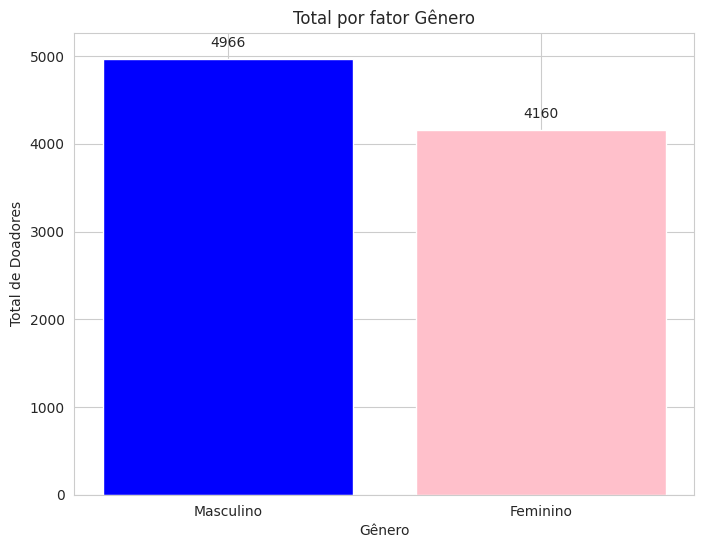

In [ ]:
dados_por_genero = tabela_total(df,'Sexo')
plot_chart(dados_por_genero,'Sexo',['blue','pink'],'Total por fator Gênero','Gênero','Total de Doadores')

# Por Tipo Sanguíneo

,ABO,total,pct
0,A,3272,35.85
1,AB,15,0.16
2,B,45,0.49
3,O,5794,63.49


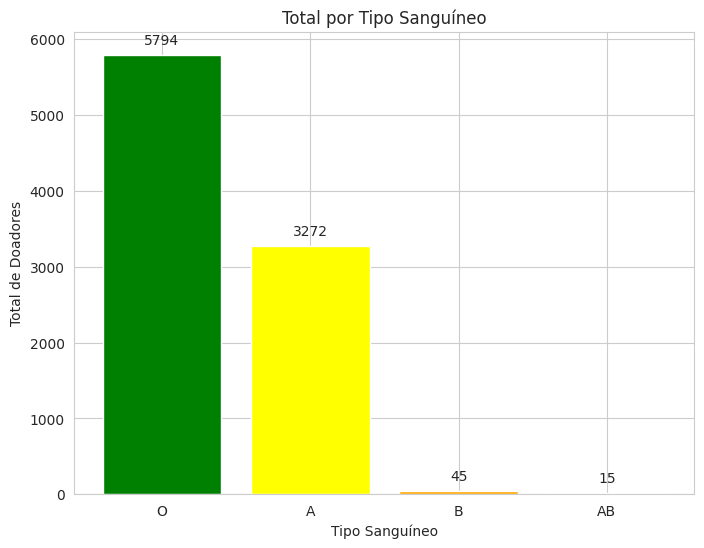

In [ ]:
dados_por_ABO = tabela_total(df,'ABO')
plot_chart(dados_por_ABO,'ABO',['green','yellow','orange','purple'],'Total por Tipo Sanguíneo','Tipo Sanguíneo','Total de Doadores')

# Por RH

,RH,total,pct
0,N,1320,14.46
1,P,7806,85.54


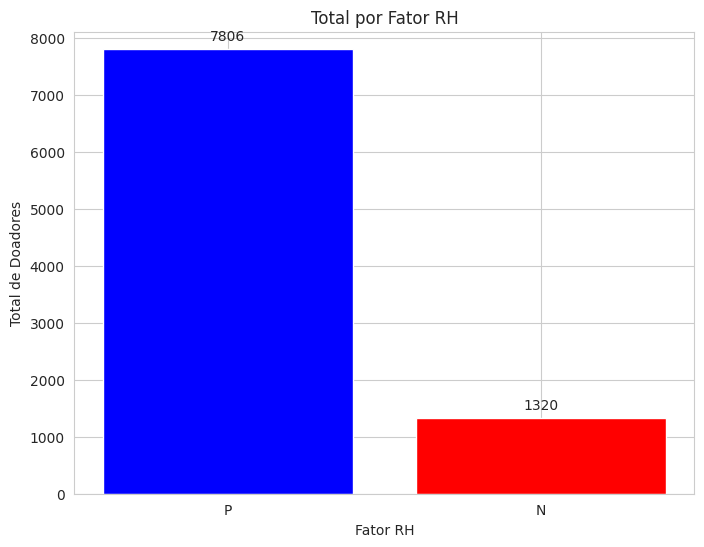

In [ ]:
dados_por_rh = tabela_total(df,'RH')
plot_chart(dados_por_rh,'RH',['blue','red'],'Total por Fator RH','Fator RH','Total de Doadores')

,ABO,RH,total,pct
0,A,N,527,5.77
1,A,P,2745,30.08
2,AB,N,3,0.03
3,AB,P,12,0.13
4,B,N,13,0.14
5,B,P,32,0.35
6,O,N,777,8.51
7,O,P,5017,54.97


<ipython-input-129-59ae38d7c3f6>:22: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0].set_color('red')
<ipython-input-129-59ae38d7c3f6>:23: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1].set_color('blue')


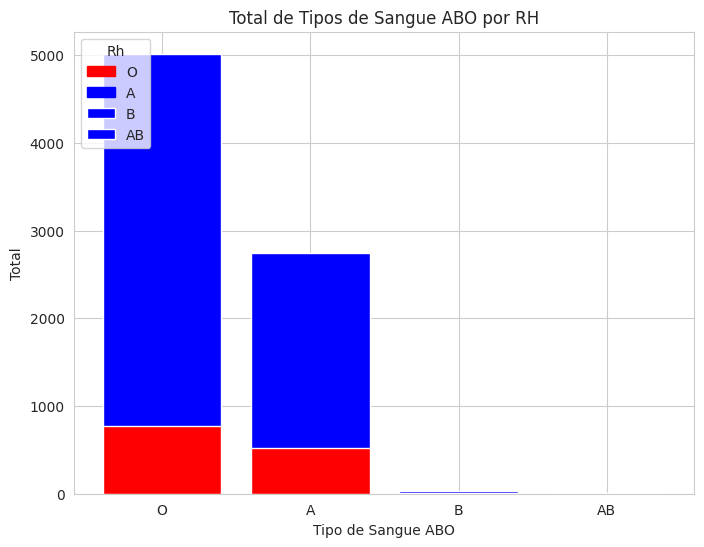

In [ ]:
dados_por_ABO_rh = df.groupby(['ABO','RH']).size().reset_index(name="total")
dados_por_ABO_rh_total = dados_por_ABO_rh['total'].sum()
dados_por_ABO_rh['pct'] = round((dados_por_ABO_rh['total']*100) / dados_por_ABO_rh_total,2)
display(dados_por_ABO_rh)


dados_por_ABO_rh = dados_por_ABO_rh.sort_values(by='total', ascending=False)
# Mapear valores 'P' para azul e 'N' para vermelho
colors = {'P': 'blue', 'N': 'red'}
# Criar um gráfico de barras empilhadas separadamente para cada tipo ABO
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
for abo in dados_por_ABO_rh['ABO'].unique():
    group = dados_por_ABO_rh[dados_por_ABO_rh['ABO'] == abo]
    plt.bar(group['ABO'], group['total'], color=[colors[rh] for rh in group['RH']], label=abo)

plt.title('Total de Tipos de Sangue ABO por RH')
plt.xlabel('Tipo de Sangue ABO')
plt.ylabel('Total')
# Personalizar as cores da legenda
legend = plt.legend(loc='upper left', title='Rh')
legend.legendHandles[0].set_color('red')
legend.legendHandles[1].set_color('blue')

# Mostrar o gráfico
plt.show()

## Por idade

,categoria_idade,total,pct
0,Acima de 60,239,2.62
1,Entre 18 e 29,2871,31.46
2,Entre 30 e 59,5980,65.53
3,Menos de 18,36,0.39


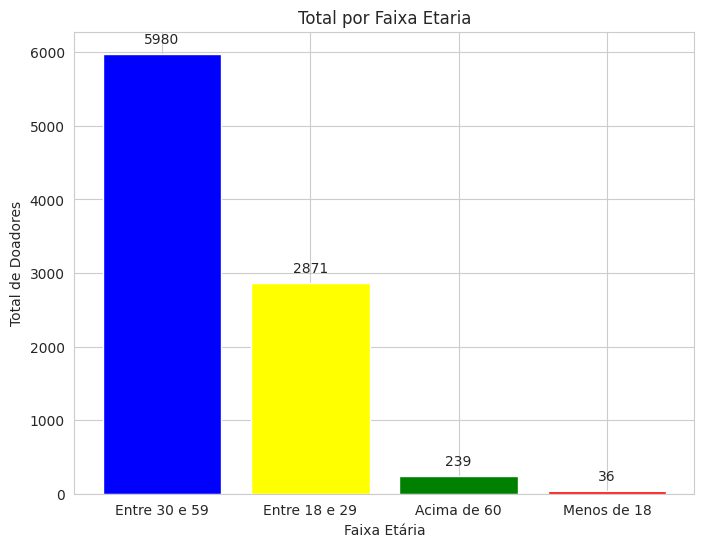

In [ ]:
#Categorizando idade
df['categoria_idade'] = df['Idade'].apply(categorizar_idade)
dados_por_idade = tabela_total(df,'categoria_idade')
plot_chart(dados_por_idade,'categoria_idade',['blue','yellow','green','red'],'Total por Faixa Etaria','Faixa Etária','Total de Doadores')

## Nacionalidade

In [ ]:
dados_por_pais = tabela_total(df,'Nacionalidade')

,Nacionalidade,total,pct
0,Argentina,26,0.28
1,Bolívia,3,0.03
2,Brasil,8436,92.44
3,Chile,3,0.03
4,China,3,0.03
5,Colômbia,6,0.07
6,Coréia do Sul,1,0.01
7,Espanha,1,0.01
8,Haiti,1,0.01
9,Japão,1,0.01


,Regiao,total,pct
0,Argentina,26,0.28
1,Brasil,8436,92.44
2,Outros países,40,0.44
3,Paraguai,624,6.84


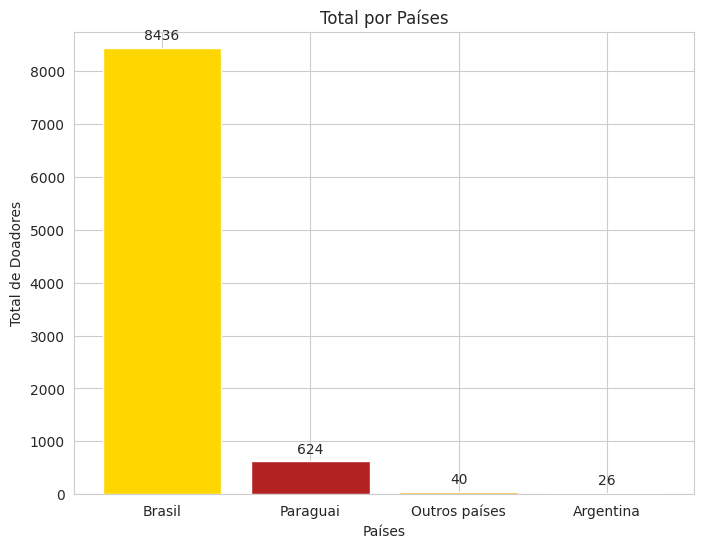

In [ ]:
# Criar a coluna 'Região' com base na coluna 'Nacionalidade', para separar entre países da Tríplice Fronteira e demais países
df['Regiao'] = df['Nacionalidade'].apply(mapear_regiao)
dados_por_regiao = tabela_total(df,'Regiao')
plot_chart(dados_por_regiao,'Regiao',['gold','firebrick','orange','lightblue'],'Total por Países','Países','Total de Doadores')

# Por Raça

,Raca,total,pct
0,Amarelo,42,0.46
1,Branco,7576,83.02
2,Indígena,2,0.02
3,Moreno/Pardo,924,10.12
4,Negro,269,2.95
5,Não informado,313,3.43


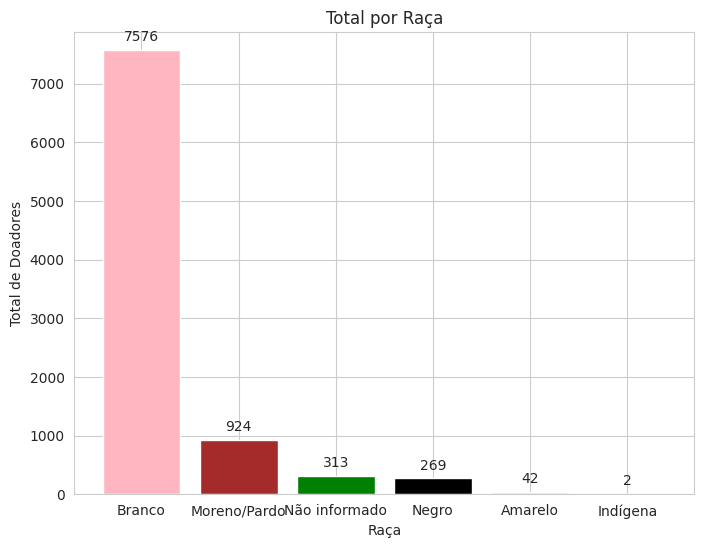

In [ ]:
dados_por_raca = tabela_total(df,'Raca')
plot_chart(dados_por_raca,'Raca',['lightpink','brown','green','black','yellow','red'],'Total por Raça','Raça','Total de Doadores')

# Manipulando Fenótipos

In [ ]:
unique_phenotypes = set()
for row in df['Fenotipagem']:
    if isinstance(row, str):  # Verifique se o valor é uma string
        phenotypes = row.split()
        for phenotype in phenotypes:
            # Remova os sinais '+' e '-' para criar o nome do fenótipo
            clean_phenotype = re.sub(r'[+-]', '', phenotype)
            unique_phenotypes.add(clean_phenotype)

# Passo 2: Criar colunas para cada fenótipo único (positivo e negativo)
for phenotype in unique_phenotypes:
    df[f'{phenotype}+'] = 0
    df[f'{phenotype}-'] = 0

# Passo 3: Preencher as colunas com base nas regras de sobreposição de fenótipos
for index, row in df.iterrows():
    if isinstance(row['Fenotipagem'], str):  # Verifique se o valor é uma string
        phenotypes = row['Fenotipagem'].split()
        for phenotype in phenotypes:
            clean_phenotype = re.sub(r'[+-]', '', phenotype)
            if '+' in phenotype:
                df.at[index, f'{clean_phenotype}+'] = 1
            elif '-' in phenotype:
                df.at[index, f'{clean_phenotype}-'] = 1

In [ ]:
# Aplicar a função à coluna 'Fenotipagem'
df['Fenotipos'] = df['Fenotipagem'].apply(extrair_fenotipos)

df

,Id_doador,ABO,RH,Fenotipagem,Sexo,Nacionalidade,Raca,Idade,categoria_idade,Regiao,E+,E-,C+,C-,Le(b)+,Le(b)-,Kp(b)+,Kp(b)-,Fy(b)+,Fy(b)-,Lu(a)+,Lu(a)-,c+,c-,s+,s-,e+,e-,Le(a)+,Le(a)-,Fy(a)+,Fy(a)-,C(w)+,C(w)-,M+,M-,k+,k-,K+,K-,Lu(b)+,Lu(b)-,P1+,P1-,N+,N-,Kp(a)+,Kp(a)-,Di(a)+,Di(a)-,Di(b)+,Di(b)-,D+,D-,Jk(b)+,Jk(b)-,S+,S-,Jk(a)+,Jk(a)-,Fenotipos
0,501561560,O,P,e+ Di(a)-,Feminino,Brasil,Branco,53,Entre 30 e 59,Brasil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"[Di(a)-, e+]"
1,251222953,A,P,Di(a)-,Masculino,Brasil,Branco,36,Entre 30 e 59,Brasil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,[Di(a)-]
2,400738878,O,N,Di(a)-,Masculino,Brasil,Branco,42,Entre 30 e 59,Brasil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,[Di(a)-]
3,664526015,A,P,Di(a)-,Feminino,Brasil,Moreno/Pardo,40,Entre 30 e 59,Brasil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,[Di(a)-]
4,858302779,O,N,Di(a)-,Masculino,Brasil,Branco,44,Entre 30 e 59,Brasil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,[Di(a)-]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9121,106895823,O,N,K-,Masculino,Brasil,Branco,36,Entre 30 e 59,Brasil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[K-]
9122,479345213,O,N,K-,Masculino,Brasil,Não informado,34,Entre 30 e 59,Brasil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[K-]
9123,601486942,O,N,K-,Masculino,Brasil,Não informado,30,Entre 30 e 59,Brasil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[K-]
9124,177320817,A,N,K-,Feminino,Brasil,Branco,34,Entre 30 e 59,Brasil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[K-]


In [ ]:
# Extrair fenótipos de todas as linhas
fenotipos_todas_linhas = extrair_fenotipos_todas_linhas(df)
#ordenando fenótipos
fenotipos_todas_linhas = sorted(fenotipos_todas_linhas)
print(fenotipos_todas_linhas)

['C(w)+', 'C(w)-', 'C+', 'C-', 'D+', 'D-', 'Di(a)+', 'Di(a)-', 'Di(b)+', 'E+', 'E-', 'Fy(a)+', 'Fy(a)-', 'Fy(b)+', 'Fy(b)-', 'Jk(a)+', 'Jk(a)-', 'Jk(b)+', 'Jk(b)-', 'K+', 'K-', 'Kp(a)+', 'Kp(a)-', 'Kp(b)+', 'Le(a)+', 'Le(a)-', 'Le(b)+', 'Le(b)-', 'Lu(a)+', 'Lu(a)-', 'Lu(b)+', 'Lu(b)-', 'M+', 'M-', 'N+', 'N-', 'P1+', 'P1-', 'S+', 'S-', 'c+', 'c-', 'e+', 'e-', 'k+', 'k-', 's+', 's-']


In [ ]:
for fenotipo in fenotipos_todas_linhas:
    df[fenotipo] = df['Fenotipos'].apply(lambda x: 1 if fenotipo in x else 0)

df = df.drop(columns={'Fenotipos'})
df

,Id_doador,ABO,RH,Fenotipagem,Sexo,Nacionalidade,Raca,Idade,categoria_idade,Regiao,E+,E-,C+,C-,Le(b)+,Le(b)-,Kp(b)+,Kp(b)-,Fy(b)+,Fy(b)-,Lu(a)+,Lu(a)-,c+,c-,s+,s-,e+,e-,Le(a)+,Le(a)-,Fy(a)+,Fy(a)-,C(w)+,C(w)-,M+,M-,k+,k-,K+,K-,Lu(b)+,Lu(b)-,P1+,P1-,N+,N-,Kp(a)+,Kp(a)-,Di(a)+,Di(a)-,Di(b)+,Di(b)-,D+,D-,Jk(b)+,Jk(b)-,S+,S-,Jk(a)+,Jk(a)-
0,501561560,O,P,e+ Di(a)-,Feminino,Brasil,Branco,53,Entre 30 e 59,Brasil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,251222953,A,P,Di(a)-,Masculino,Brasil,Branco,36,Entre 30 e 59,Brasil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,400738878,O,N,Di(a)-,Masculino,Brasil,Branco,42,Entre 30 e 59,Brasil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,664526015,A,P,Di(a)-,Feminino,Brasil,Moreno/Pardo,40,Entre 30 e 59,Brasil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,858302779,O,N,Di(a)-,Masculino,Brasil,Branco,44,Entre 30 e 59,Brasil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9121,106895823,O,N,K-,Masculino,Brasil,Branco,36,Entre 30 e 59,Brasil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9122,479345213,O,N,K-,Masculino,Brasil,Não informado,34,Entre 30 e 59,Brasil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9123,601486942,O,N,K-,Masculino,Brasil,Não informado,30,Entre 30 e 59,Brasil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9124,177320817,A,N,K-,Feminino,Brasil,Branco,34,Entre 30 e 59,Brasil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dados_soma = df[fenotipos_todas_linhas]
dados_soma = dados_soma.sum()
dados_soma = dados_soma.reset_index(name='doadores')
total_doadores = df.shape[0]
dados_soma['pct'] = round((dados_soma['doadores']*100)/total_doadores,2)
dados_soma.sort_values(['pct'],ascending=False)

,index,doadores,pct
20,K-,8232,90.20
23,Kp(b)+,3132,34.32
44,k+,3130,34.30
22,Kp(a)-,3093,33.89
42,e+,3075,33.69
30,Lu(b)+,3071,33.65
29,Lu(a)-,2902,31.80
46,s+,2763,30.28
25,Le(a)-,2663,29.18
40,c+,2586,28.34


# Análise por fenotipagem

In [ ]:
dados_basicos = df.drop(columns={'ABO','RH','Fenotipagem','Nacionalidade','Idade'})

In [ ]:
dados_basicos.head(1)

,Id_doador,Sexo,Raca,categoria_idade,Regiao,E+,E-,C+,C-,Le(b)+,Le(b)-,Kp(b)+,Kp(b)-,Fy(b)+,Fy(b)-,Lu(a)+,Lu(a)-,c+,c-,s+,s-,e+,e-,Le(a)+,Le(a)-,Fy(a)+,Fy(a)-,C(w)+,C(w)-,M+,M-,k+,k-,K+,K-,Lu(b)+,Lu(b)-,P1+,P1-,N+,N-,Kp(a)+,Kp(a)-,Di(a)+,Di(a)-,Di(b)+,Di(b)-,D+,D-,Jk(b)+,Jk(b)-,S+,S-,Jk(a)+,Jk(a)-
0,501561560,Feminino,Branco,Entre 30 e 59,Brasil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
fenotipos = dados_basicos.columns[5:]

resultados = pd.DataFrame(index=fenotipos, columns=['total_fenotipo','F', 'M'])

# Agregação dos valores
for fenotipo in fenotipos:
    resultados.at[fenotipo, 'total_fenotipo'] = dados_basicos[fenotipo].sum()
    resultados.at[fenotipo, 'F'] = dados_basicos[dados_basicos['Sexo'] == 'Feminino'][fenotipo].sum()
    resultados.at[fenotipo, 'M'] = dados_basicos[dados_basicos['Sexo'] == 'Masculino'][fenotipo].sum()

resultados['pct_F'] = ((resultados['F']*100)/resultados['total_fenotipo']).astype(float)
resultados['pct_M'] = ((resultados['M']*100)/resultados['total_fenotipo']).astype(float)
#resultados = resultados.drop(columns={'total_fenotipo'})
resultados['pct_F'] = round(resultados['pct_F'],2)
resultados['pct_M'] = round(resultados['pct_M'],2)
resultados.head(10)

,total_fenotipo,F,M,pct_F,pct_M
E+,756,252,504,33.33,66.67
E-,2407,1037,1370,43.08,56.92
C+,1737,695,1042,40.01,59.99
C-,1417,588,829,41.50,58.50
Le(b)+,2266,914,1352,40.34,59.66
Le(b)-,808,330,478,40.84,59.16
Kp(b)+,3132,1272,1860,40.61,59.39
Kp(b)-,0,0,0,NaN,NaN
Fy(b)+,2350,974,1376,41.45,58.55
Fy(b)-,760,285,475,37.50,62.50


In [ ]:
fenotipos = dados_basicos.columns[5:]

resultados['Branco'] = 0  # Inicialmente, preencha as colunas com zeros
resultados['Moreno_Pardo'] = 0
resultados['Negro'] = 0
resultados['Amarelo'] = 0
resultados['Indígena'] = 0
resultados['Nao_informado'] = 0

# Agregação dos valores
for fenotipo in fenotipos:
    resultados.at[fenotipo, 'Branco'] = dados_basicos[dados_basicos['Raca'] == 'Branco'][fenotipo].sum()
    resultados.at[fenotipo, 'Moreno_Pardo'] = dados_basicos[dados_basicos['Raca'] == 'Moreno/Pardo'][fenotipo].sum()
    resultados.at[fenotipo, 'Negro'] = dados_basicos[dados_basicos['Raca'] == 'Negro'][fenotipo].sum()
    resultados.at[fenotipo, 'Amarelo'] = dados_basicos[dados_basicos['Raca'] == 'Amarelo'][fenotipo].sum()
    resultados.at[fenotipo, 'Indigena'] = dados_basicos[dados_basicos['Raca'] == 'Indígena'][fenotipo].sum()
    resultados.at[fenotipo, 'Nao_informado'] = dados_basicos[dados_basicos['Raca'] == 'Não informado'][fenotipo].sum()

resultados['pct_Branco'] = ((resultados['Branco']*100)/resultados['total_fenotipo']).astype(float)
resultados['pct_Moreno_Pardo'] = ((resultados['Moreno_Pardo']*100)/resultados['total_fenotipo']).astype(float)
resultados['pct_Negro'] = ((resultados['Negro']*100)/resultados['total_fenotipo']).astype(float)
resultados['pct_Amarelo'] = ((resultados['Amarelo']*100)/resultados['total_fenotipo']).astype(float)
resultados['pct_Indigena'] = ((resultados['Indigena']*100)/resultados['total_fenotipo']).astype(float)
resultados['pct_Nao_informado'] = ((resultados['Nao_informado']*100)/resultados['total_fenotipo']).astype(float)
resultados['pct_Branco'] = round(resultados['pct_Branco'],2)
resultados['pct_Moreno_Pardo'] = round(resultados['pct_Moreno_Pardo'],2)
resultados['pct_Negro'] = round(resultados['pct_Negro'],2)
resultados['pct_Amarelo'] = round(resultados['pct_Amarelo'],2)
resultados['pct_Indigena'] = round(resultados['pct_Indigena'],2)
resultados['pct_Nao_informado'] = round(resultados['pct_Nao_informado'],2)
# Visualize o DataFrame de resultados
resultados.head(10)

,total_fenotipo,F,M,pct_F,pct_M,Branco,Moreno_Pardo,Negro,Amarelo,Indígena,Nao_informado,Indigena,pct_Branco,pct_Moreno_Pardo,pct_Negro,pct_Amarelo,pct_Indigena,pct_Nao_informado
E+,756,252,504,33.33,66.67,624,92,28,5,0,7,0.0,82.54,12.17,3.70,0.66,0.00,0.93
E-,2407,1037,1370,43.08,56.92,2050,216,83,11,0,46,1.0,85.17,8.97,3.45,0.46,0.04,1.91
C+,1737,695,1042,40.01,59.99,1487,176,44,10,0,19,1.0,85.61,10.13,2.53,0.58,0.06,1.09
C-,1417,588,829,41.50,58.50,1180,132,65,6,0,34,0.0,83.27,9.32,4.59,0.42,0.00,2.40
Le(b)+,2266,914,1352,40.34,59.66,1926,222,74,11,0,32,1.0,85.00,9.80,3.27,0.49,0.04,1.41
Le(b)-,808,330,478,40.84,59.16,675,82,31,5,0,15,0.0,83.54,10.15,3.84,0.62,0.00,1.86
Kp(b)+,3132,1272,1860,40.61,59.39,2650,308,109,16,0,48,1.0,84.61,9.83,3.48,0.51,0.03,1.53
Kp(b)-,0,0,0,NaN,NaN,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
Fy(b)+,2350,974,1376,41.45,58.55,2019,217,68,10,0,36,0.0,85.91,9.23,2.89,0.43,0.00,1.53
Fy(b)-,760,285,475,37.50,62.50,613,89,39,6,0,12,1.0,80.66,11.71,5.13,0.79,0.13,1.58


In [ ]:
fenotipos = dados_basicos.columns[5:]

resultados['Bra'] = 0
resultados['Par'] = 0
resultados['Arg'] = 0
resultados['Out'] = 0

for fenotipo in fenotipos:
    resultados.at[fenotipo, 'Bra'] = dados_basicos[dados_basicos['Regiao'] == 'Brasil'][fenotipo].sum()
    resultados.at[fenotipo, 'Par'] = dados_basicos[dados_basicos['Regiao'] == 'Paraguai'][fenotipo].sum()
    resultados.at[fenotipo, 'Arg'] = dados_basicos[dados_basicos['Regiao'] == 'Argentina'][fenotipo].sum()
    resultados.at[fenotipo, 'Out'] = dados_basicos[dados_basicos['Regiao'] == 'Outros'][fenotipo].sum()

resultados['pct_Bra'] = ((resultados['Bra']*100)/resultados['total_fenotipo']).astype(float)
resultados['pct_Par'] = ((resultados['Par']*100)/resultados['total_fenotipo']).astype(float)
resultados['pct_Arg'] = ((resultados['Arg']*100)/resultados['total_fenotipo']).astype(float)
resultados['pct_Out'] = ((resultados['Out']*100)/resultados['total_fenotipo']).astype(float)
resultados['pct_Bra'] = round(resultados['pct_Bra'],2)
resultados['pct_Par'] = round(resultados['pct_Par'],2)
resultados['pct_Arg'] = round(resultados['pct_Arg'],2)
resultados['pct_Out'] = round(resultados['pct_Out'],2)
# Visualize o DataFrame de resultados
resultados.head(10)

,total_fenotipo,F,M,pct_F,pct_M,Branco,Moreno_Pardo,Negro,Amarelo,Indígena,Nao_informado,Indigena,pct_Branco,pct_Moreno_Pardo,pct_Negro,pct_Amarelo,pct_Indigena,pct_Nao_informado,Bra,Par,Arg,Out,pct_Bra,pct_Par,pct_Arg,pct_Out
E+,756,252,504,33.33,66.67,624,92,28,5,0,7,0.0,82.54,12.17,3.70,0.66,0.00,0.93,727,25,2,0,96.16,3.31,0.26,0.0
E-,2407,1037,1370,43.08,56.92,2050,216,83,11,0,46,1.0,85.17,8.97,3.45,0.46,0.04,1.91,2324,68,3,0,96.55,2.83,0.12,0.0
C+,1737,695,1042,40.01,59.99,1487,176,44,10,0,19,1.0,85.61,10.13,2.53,0.58,0.06,1.09,1674,47,5,0,96.37,2.71,0.29,0.0
C-,1417,588,829,41.50,58.50,1180,132,65,6,0,34,0.0,83.27,9.32,4.59,0.42,0.00,2.40,1368,46,0,0,96.54,3.25,0.00,0.0
Le(b)+,2266,914,1352,40.34,59.66,1926,222,74,11,0,32,1.0,85.00,9.80,3.27,0.49,0.04,1.41,2183,69,2,0,96.34,3.05,0.09,0.0
Le(b)-,808,330,478,40.84,59.16,675,82,31,5,0,15,0.0,83.54,10.15,3.84,0.62,0.00,1.86,781,22,3,0,96.66,2.72,0.37,0.0
Kp(b)+,3132,1272,1860,40.61,59.39,2650,308,109,16,0,48,1.0,84.61,9.83,3.48,0.51,0.03,1.53,3021,92,5,0,96.46,2.94,0.16,0.0
Kp(b)-,0,0,0,NaN,NaN,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
Fy(b)+,2350,974,1376,41.45,58.55,2019,217,68,10,0,36,0.0,85.91,9.23,2.89,0.43,0.00,1.53,2266,71,4,0,96.43,3.02,0.17,0.0
Fy(b)-,760,285,475,37.50,62.50,613,89,39,6,0,12,1.0,80.66,11.71,5.13,0.79,0.13,1.58,733,21,1,0,96.45,2.76,0.13,0.0


In [ ]:
fenotipos = dados_basicos.columns[5:]

resultados['Menos_18'] = 0
resultados['Entre_18_29'] = 0
resultados['Entre_30_59'] = 0
resultados['Acima_60'] = 0

for fenotipo in fenotipos:
    resultados.at[fenotipo, 'Menos_18'] = dados_basicos[dados_basicos['categoria_idade'] == 'Menos de 18'][fenotipo].sum()
    resultados.at[fenotipo, 'Entre_18_29'] = dados_basicos[dados_basicos['categoria_idade'] == 'Entre 19 e 29'][fenotipo].sum()
    resultados.at[fenotipo, 'Entre_30_59'] = dados_basicos[dados_basicos['categoria_idade'] == 'Entre 30 e 59'][fenotipo].sum()
    resultados.at[fenotipo, 'Acima_60'] = dados_basicos[dados_basicos['categoria_idade'] == 'Acima de 60'][fenotipo].sum()

resultados['pct_Menos_18'] = ((resultados['Menos_18']*100)/resultados['total_fenotipo']).astype(float)
resultados['pct_Entre_18_29'] = ((resultados['Entre_18_29']*100)/resultados['total_fenotipo']).astype(float)
resultados['pct_Entre_30_59'] = ((resultados['Entre_30_59']*100)/resultados['total_fenotipo']).astype(float)
resultados['pct_Acima_60'] = ((resultados['Acima_60']*100)/resultados['total_fenotipo']).astype(float)
resultados['pct_Menos_18'] = round(resultados['pct_Menos_18'],2)
resultados['pct_Entre_18_29'] = round(resultados['pct_Entre_18_29'],2)
resultados['pct_Entre_30_59'] = round(resultados['pct_Entre_30_59'],2)
resultados['pct_Acima_60'] = round(resultados['pct_Acima_60'],2)

resultados.head(10)

,total_fenotipo,F,M,pct_F,pct_M,Branco,Moreno_Pardo,Negro,Amarelo,Indígena,Nao_informado,Indigena,pct_Branco,pct_Moreno_Pardo,pct_Negro,pct_Amarelo,pct_Indigena,pct_Nao_informado,Bra,Par,Arg,Out,pct_Bra,pct_Par,pct_Arg,pct_Out,Menos_18,Entre_18_29,Entre_30_59,Acima_60,pct_Menos_18,pct_Entre_18_29,pct_Entre_30_59,pct_Acima_60
E+,756,252,504,33.33,66.67,624,92,28,5,0,7,0.0,82.54,12.17,3.70,0.66,0.00,0.93,727,25,2,0,96.16,3.31,0.26,0.0,2,0,545,27,0.26,0.0,72.09,3.57
E-,2407,1037,1370,43.08,56.92,2050,216,83,11,0,46,1.0,85.17,8.97,3.45,0.46,0.04,1.91,2324,68,3,0,96.55,2.83,0.12,0.0,5,0,1729,76,0.21,0.0,71.83,3.16
C+,1737,695,1042,40.01,59.99,1487,176,44,10,0,19,1.0,85.61,10.13,2.53,0.58,0.06,1.09,1674,47,5,0,96.37,2.71,0.29,0.0,1,0,1282,55,0.06,0.0,73.81,3.17
C-,1417,588,829,41.50,58.50,1180,132,65,6,0,34,0.0,83.27,9.32,4.59,0.42,0.00,2.40,1368,46,0,0,96.54,3.25,0.00,0.0,4,0,991,47,0.28,0.0,69.94,3.32
Le(b)+,2266,914,1352,40.34,59.66,1926,222,74,11,0,32,1.0,85.00,9.80,3.27,0.49,0.04,1.41,2183,69,2,0,96.34,3.05,0.09,0.0,3,0,1629,76,0.13,0.0,71.89,3.35
Le(b)-,808,330,478,40.84,59.16,675,82,31,5,0,15,0.0,83.54,10.15,3.84,0.62,0.00,1.86,781,22,3,0,96.66,2.72,0.37,0.0,2,0,592,26,0.25,0.0,73.27,3.22
Kp(b)+,3132,1272,1860,40.61,59.39,2650,308,109,16,0,48,1.0,84.61,9.83,3.48,0.51,0.03,1.53,3021,92,5,0,96.46,2.94,0.16,0.0,5,0,2260,103,0.16,0.0,72.16,3.29
Kp(b)-,0,0,0,NaN,NaN,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
Fy(b)+,2350,974,1376,41.45,58.55,2019,217,68,10,0,36,0.0,85.91,9.23,2.89,0.43,0.00,1.53,2266,71,4,0,96.43,3.02,0.17,0.0,3,0,1699,77,0.13,0.0,72.30,3.28
Fy(b)-,760,285,475,37.50,62.50,613,89,39,6,0,12,1.0,80.66,11.71,5.13,0.79,0.13,1.58,733,21,1,0,96.45,2.76,0.13,0.0,2,0,545,25,0.26,0.0,71.71,3.29


In [ ]:
total_doadores = dados_basicos.shape[0]
resultados['pct_fenotipo'] = (resultados['total_fenotipo'].astype(float)*100)/total_doadores
resultados['pct_fenotipo'] = round(resultados['pct_fenotipo'],2)
resultados = resultados[['total_fenotipo','pct_fenotipo','F','M','pct_F','pct_M','Branco','Moreno_Pardo','Negro','Amarelo','Indígena','Nao_informado','Indigena','pct_Branco','pct_Moreno_Pardo','pct_Negro','pct_Amarelo','pct_Indigena','pct_Nao_informado','Bra','Par','Arg','Out','pct_Bra','pct_Par','pct_Arg','pct_Out','Menos_18','Entre_18_29','Entre_30_59','Acima_60','pct_Menos_18','pct_Entre_18_29','pct_Entre_30_59','pct_Acima_60']]
resultados

,total_fenotipo,pct_fenotipo,F,M,pct_F,pct_M,Branco,Moreno_Pardo,Negro,Amarelo,Indígena,Nao_informado,Indigena,pct_Branco,pct_Moreno_Pardo,pct_Negro,pct_Amarelo,pct_Indigena,pct_Nao_informado,Bra,Par,Arg,Out,pct_Bra,pct_Par,pct_Arg,pct_Out,Menos_18,Entre_18_29,Entre_30_59,Acima_60,pct_Menos_18,pct_Entre_18_29,pct_Entre_30_59,pct_Acima_60
E+,756,8.28,252,504,33.33,66.67,624,92,28,5,0,7,0.0,82.54,12.17,3.70,0.66,0.00,0.93,727,25,2,0,96.16,3.31,0.26,0.0,2,0,545,27,0.26,0.0,72.09,3.57
E-,2407,26.38,1037,1370,43.08,56.92,2050,216,83,11,0,46,1.0,85.17,8.97,3.45,0.46,0.04,1.91,2324,68,3,0,96.55,2.83,0.12,0.0,5,0,1729,76,0.21,0.0,71.83,3.16
C+,1737,19.03,695,1042,40.01,59.99,1487,176,44,10,0,19,1.0,85.61,10.13,2.53,0.58,0.06,1.09,1674,47,5,0,96.37,2.71,0.29,0.0,1,0,1282,55,0.06,0.0,73.81,3.17
C-,1417,15.53,588,829,41.50,58.50,1180,132,65,6,0,34,0.0,83.27,9.32,4.59,0.42,0.00,2.40,1368,46,0,0,96.54,3.25,0.00,0.0,4,0,991,47,0.28,0.0,69.94,3.32
Le(b)+,2266,24.83,914,1352,40.34,59.66,1926,222,74,11,0,32,1.0,85.00,9.80,3.27,0.49,0.04,1.41,2183,69,2,0,96.34,3.05,0.09,0.0,3,0,1629,76,0.13,0.0,71.89,3.35
Le(b)-,808,8.85,330,478,40.84,59.16,675,82,31,5,0,15,0.0,83.54,10.15,3.84,0.62,0.00,1.86,781,22,3,0,96.66,2.72,0.37,0.0,2,0,592,26,0.25,0.0,73.27,3.22
Kp(b)+,3132,34.32,1272,1860,40.61,59.39,2650,308,109,16,0,48,1.0,84.61,9.83,3.48,0.51,0.03,1.53,3021,92,5,0,96.46,2.94,0.16,0.0,5,0,2260,103,0.16,0.0,72.16,3.29
Kp(b)-,0,0.00,0,0,NaN,NaN,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
Fy(b)+,2350,25.75,974,1376,41.45,58.55,2019,217,68,10,0,36,0.0,85.91,9.23,2.89,0.43,0.00,1.53,2266,71,4,0,96.43,3.02,0.17,0.0,3,0,1699,77,0.13,0.0,72.30,3.28
Fy(b)-,760,8.33,285,475,37.50,62.50,613,89,39,6,0,12,1.0,80.66,11.71,5.13,0.79,0.13,1.58,733,21,1,0,96.45,2.76,0.13,0.0,2,0,545,25,0.26,0.0,71.71,3.29


In [ ]:
resultados = resultados.reset_index()
resultados = resultados.rename(columns={'index': 'fenotipo'})
resultados.head(5)

,fenotipo,fenotipo,total_fenotipo,pct_fenotipo,F,M,pct_F,pct_M,Branco,Moreno_Pardo,Negro,Amarelo,Indígena,Nao_informado,Indigena,pct_Branco,pct_Moreno_Pardo,pct_Negro,pct_Amarelo,pct_Indigena,pct_Nao_informado,Bra,Par,Arg,Out,pct_Bra,pct_Par,pct_Arg,pct_Out,Menos_18,Entre_18_29,Entre_30_59,Acima_60,pct_Menos_18,pct_Entre_18_29,pct_Entre_30_59,pct_Acima_60
0,0,E+,756,8.28,252,504,33.33,66.67,624,92,28,5,0,7,0.0,82.54,12.17,3.70,0.66,0.00,0.93,727,25,2,0,96.16,3.31,0.26,0.0,2,0,545,27,0.26,0.0,72.09,3.57
1,1,E-,2407,26.38,1037,1370,43.08,56.92,2050,216,83,11,0,46,1.0,85.17,8.97,3.45,0.46,0.04,1.91,2324,68,3,0,96.55,2.83,0.12,0.0,5,0,1729,76,0.21,0.0,71.83,3.16
2,2,C+,1737,19.03,695,1042,40.01,59.99,1487,176,44,10,0,19,1.0,85.61,10.13,2.53,0.58,0.06,1.09,1674,47,5,0,96.37,2.71,0.29,0.0,1,0,1282,55,0.06,0.0,73.81,3.17
3,3,C-,1417,15.53,588,829,41.50,58.50,1180,132,65,6,0,34,0.0,83.27,9.32,4.59,0.42,0.00,2.40,1368,46,0,0,96.54,3.25,0.00,0.0,4,0,991,47,0.28,0.0,69.94,3.32
4,4,Le(b)+,2266,24.83,914,1352,40.34,59.66,1926,222,74,11,0,32,1.0,85.00,9.80,3.27,0.49,0.04,1.41,2183,69,2,0,96.34,3.05,0.09,0.0,3,0,1629,76,0.13,0.0,71.89,3.35


In [ ]:
nome_arquivo_excel = 'tabela_final.xlsx'

# Exporte o DataFrame para o arquivo Excel
resultados.to_excel(nome_arquivo_excel, index=False)  # O argumento index=False evita que o índice seja exportado

print(f'DataFrame exportado para {nome_arquivo_excel}')
files.download(nome_arquivo_excel)

DataFrame exportado para tabela_final.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Conclusões

Após fazer o pré-processamento dos dados, gerar plots de acordo com seus atributos, categorizar atributos, calcular a presença dos fenótipos para cada um, foi gerado o arquivo tabela final. Nela é possível identificar a totalização de doadores de cada fenótipo e se existe alguma predominancia de acordo com as características (Raça, Nacionalidade e Faixa Etária). Com essa tabela, é possível passar uma visão completa de várias divisões dentro dessa base de dados, permitindo que uma pessoa que não tenha um grande conhecimento sobre dados, tirar suas próprias conclusões e identificar padrões